데이터 및 코드: https://github.com/datascienceabe/study_open/tree/master/A_B_testing

# A/B Testing

- 광고 A와 광고 B 중 어떤 광고가 좋은 광고일까?
- CTR (Click Through Rate): 사이트에 들어온 사람이 광고를 누르는 비율<br>
- Conversion Rate: 방문자중 실제 광고로 구매<br>
<br>

- CTR을 통해 사람들에게 광고가 얼마나 노출이 됐는지 알수 있음
- Conversion Rate은 광고가 실제 구매로 이어지게 할까?

참고:https://github.com/lazyprogrammer/machine_learning_examples/tree/master/ab_testing

데이터 출처:https://github.com/lazyprogrammer/machine_learning_examples/tree/master/ab_testing

# 1. Review: Frequentist Approach 

광고 A와 광고 B를 비교한다는 것은 두 그룹을 비교한다는 것

<b>P-value</b>
- 귀무가설이 참일 때 실제 관측한 것 보다 더 극단적인 결과를 얻을 확률
- p-value가 작다 <br>
=> 귀무가설이 참일 때 내가 관측한 데이터보다 더 극단적인 증거가 나타날 확률 적음 <br>
=> 내가 갖고 있는 데이터가 충분히 극단적임<br>
=> 귀무 가설을 기각

<b>Statistical Power</b><br>
- Power = P(reject $H_{0}$| $ H_{1}$ is true)<br>
- Sensitivity와 같은 개념<br>
- 1-Power=P(Not reject $H_{0}$| $H_{1}$ is true)
- (Not reject $H_{0}$| $H_{1}$ is true)을 Type2 에러라고 함 (FN)

- Power가 높아지면 대립 가설이 참일 때 귀무가설을 기각하지 못할 확률이 낮아짐 (바람직)
- $\beta$=P(Not reject $H_{0}$| $H_{1}$ is true)로 Type2 에러의 확률 (FP)
- 1-$\beta$=Power
- 즉 Type2 에러 확률을 낮추기 위해 Power를 높이고 싶음

<b>Power analysis</b>
- 실험을 위해 sample이 얼마나 필요한지 분석하는 방법
- Power는 sample size와 effect size(두 그룹 간의 차이)에 영향을 받음
- Sample size는 검정 통계량, p-value에 직접적인 영향
- 또한 Sample size와 effect size가 클 수록 power가 높아짐


<b>샘플 사이즈 정하는 방법 (Rule of Thumbs)</b>
- $N=16\frac{\sigma^{2}}{\delta^{2}}$
- $\sigma^{2}$: 데이터의 분산
- $\delta^{2}$: 발견하고 싶은 최소한의 차이 (effective size)
- 발견하고 싶은 차이가 작을 수록 필요한 샘플의 수가 늘어남

<b>1) p-value 문제점: 유의 수준</b>
- 유의 수준을 5퍼센트로 설정했을 때 A그룹과 B그룹이 같은데도 5%의 시행에서는 유의하다고 오판할 수 있음
- 예를 들어, 1번 시나리오에서는 500개의 샘플, 1000개의 샘플, 5000개의 샘플에서 모두 유의하지 않다고 하지만
- 2번 시나리오에서는 유의하지 않다고 했다가 유의, 유의 하다고 할 수 있음<br>
=> 5%의 시행에서는 유의하다고 오판 가능성<br>
=> 일관 된지 않은 결론 내릴 수 있음

<b>2) p-value 문제점: Type 2 에러의 가능성</b><br>
- p-value가 높다<br>
=> 귀무가설이 참일 때 내가 관측한 데이터보다 더 극단적인 증거가 나타날 확률 높음<br>
=> 내가 갖고 있는 데이터가 충분히 극단적이지 않음<br>
=> 귀무 가설을 수용하지 않음 (Not reject $H_{0}$)<br>
- 하지만 귀무 가설을 수용하지 않은 것이 Type2 에러를 저질러서 일 수 있음<br>
=> 즉 statistical power가 충분하지 않아서 대립가설이 참인데도 귀무가설을 기각하지 못 해버림

<b>3) p-value 문제점: Sample size</b>
- 2번과 같은 맥락으로 샘플사이즈가 적으면 파워가 약해짐
- 데이터의 분산이 클 수록 더 많은 데이터가 필요함
- 하지만 샘플 사이즈가 안 커도 판단을 내릴 수 있을 때가 있음<br>
<br>
- 예를 들어 신약을 테스트할 때, 약에 대해 과학적으로 알기 때문에 확신이 있는 경우
- 테스트 진행 후, 확실히 잘 작용했지만 테스트를 미리 끝내고 신약을 미리 배포할 수가 없음
- Conversion rate를 비교할 때 B 사이트가 훨씬 구매로 많이 연결되는데도 중간에 실험을 중단 못함


<b>4) p-value 문제점: 직관적인 해석의 문제</b>
- 집단 간의 비교를 할 때 p-value는 2 그룹이 차이가 없다고 했을 때 차이를 발견할 확률이라고 할 수 있음
- 이미 집단 간의 차이가 없는 상황에서 차이가 있는 것을 발견해야 하는 확률이라고 하여 비전공자와의 소통이 어려움

# 2. t-Test

$H_{0}: \mu_{1}=\mu_{2}$<br>
$H_{1}: Not H_{0}$<br>

두 그룹 간의 차이가 있는가를 확인하는 방법

가정
1. $X_{1}$ $\sim Gaussian$,$X_{2}$ $\sim Gaussian$<br>
:두 집단이 모두 정규 분포를 따름
2. 두 집단 간의 분산의 차이가 없음

- 통계량: $T=\frac{\bar{X}_{1}-\bar{X}_{2}}{s_{p}\sqrt{ \frac{1}{n_{1}}+\frac{1}{n_{2}}   }  } $
- $s_{p}= \sqrt{\frac{(n_{1}-1) s_{1}^{2}+(n_{2}-1)s_{2}^{2}}{ n_{1}+n_{2}+ 2}  }$

- $X_{1}$과 $X_{2}$의 차이가 커질 수록 T 값이 커짐 => 두 집단이 다를 가능성이 커짐
- $s_{p}$가 커지면 T는 급격히 감소 => 두 집단이 같을 가능성이 커짐
- N(sample size)가 작아질 수록 T가 감소 => Sample Size가 작으면 기각할 확률이 줄어 들음
- Test static의 분포에서 극단적인 값이면 귀무가설을 기각

<b>Shipro Test를 통해 정규성 검정</b><br>
- $H_{0}$: 데이터가 정규성 분포를 따름

In [4]:
#shapiro Test for checking normality
from scipy import stats
print(stats.shapiro(a))
print(stats.shapiro(b))

(0.9644960761070251, 0.8356609344482422)
(0.9428867697715759, 0.585559606552124)


- 첫번째 값은 T값, 두번째 값은 p-value
- 남자 집단과 여자 집단 모두 p-value가 높음
- $H_{0}$을 기각 못해 두 데이터 모두 정규성을 따름

Levene Test를 통한 동분산 검정
- $H_{0}:\sigma_{1}=\sigma_{2}$

In [7]:
from scipy.stats import levene
levene(a,b)

LeveneResult(statistic=2.0067799003161295, pvalue=0.1736719329634852)

- Levene Test를 했을 때 유의하지 않음
- 귀무가설을 기각하지 못해 동분산성 가정

In [8]:
# t-test
import numpy as np
from scipy import stats
N=10 # 10 data for each group

np.random.seed(0)
a=np.random.randn(N) +2
b=np.random.randn(N)

var_a=a.var(ddof=1)
var_b=b.var(ddof=1)
s=np.sqrt( (var_a+var_b)/2 )

#Test statictic
T=(a.mean()-b.mean()  ) /( s*np.sqrt(2.0/N)  )
df=2*N-2
p=1-stats.t.cdf(T,df=df)
print("T:\T",T,"p:\t",2*p)

T:\T 5.950374249970887 p:	 1.2477606892158377e-05


In [9]:
#use bulit-in library
from scipy import stats
T2, p2= stats.ttest_ind(a,b)
print("T2:\T",T2,"p2:\t",p2)

T2:\T 5.950374249970887 p2:	 1.2477606892275706e-05


- p-value가 거의 0에 가까움
- 귀무가설이 참일 때 내가 관측한 데이터보다 더 극단적인 증거가 나타날 확률 적음 => 내가 갖고 있는 데이터가 충분히 극단적임
- $H_{0}$기각
- 남자 집단과 여자 집단의 차이가 있다

<b>만약 두 집단의 분산이 다르면?</b>

Welch's t-test
- 절차는 똑같지만 T 값과 자유도가 다름
- $T=\frac{\bar{X}_{1}-\bar{X}_{2}}{\sqrt{ \frac{s_{1}^{2} }{n_{1} }+\frac{s_{2}^{2}}{n_{2}}   }  } $
- $s_{p}= \sqrt{\frac{(n_{1}-1) s_{1}^{2}+(n_{2}-1)s_{2}^{2}}{ n_{1}+n_{2}+ 2}  }$
- 자유도 복잡

In [10]:
#use bulit-in library
T3, p3= stats.ttest_ind(a,b,  equal_var = False)
print("T3:\T",T3,"p3:\t",p3)

T3:\T 5.950374249970887 p3:	 1.9999750510910725e-05


- p-value 매우 작아 귀무 가설 기각 (유의하다)
- 두 집단 간에 차이가 있다

<b>분포 가정을 사용하지 않을 때</b>

Nonparametric Test
- Kolmogorov-Smirnov Test
- Kruskal Wallis test
- Mann-Whitney U test

- 가정이 적기 때문에 파워가 작아짐
- 따라서 유의하기 위해서는 p-value가 더 극단값이어야 됨


In [11]:
#Kolmogorov-Smirnov Test
from scipy.stats import ks_2samp
ks_2samp(a, b)

Ks_2sampResult(statistic=0.9, pvalue=0.00017011925273829756)

In [12]:
#Mann-Whitney U test
from scipy.stats import mannwhitneyu
mannwhitneyu(a,b)

MannwhitneyuResult(statistic=2.0, pvalue=0.00016491926038899677)

- Kolmogorvo, Mann-Whitney U test 모두 귀무 가설 기각

예제
- 데이터: 광고 A와 광고 B의 클릭 횟수
- 접속자가 광고 A나, B 둘 중에 하나는 무조건 클릭 (현실과는 거리가 있음)
- 광고 A와 광고 B는 차이가 있을까?

In [1]:
import os
import pandas as pd
os.chdir('C:/Users/bki19/Desktop/A_B_testing')
df=pd.read_csv('./data/advertisement_clicks.csv')

In [14]:
df.head()

,advertisement_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


In [2]:
XA=df[df['advertisement_id']=='A']['action']
XB=df[df['advertisement_id']=='B']['action']
print("XA.mean:", XA.mean())
print("XB.mean:", XB.mean())

XA.mean: 0.304
XB.mean: 0.372


<function matplotlib.pyplot.show(*args, **kw)>

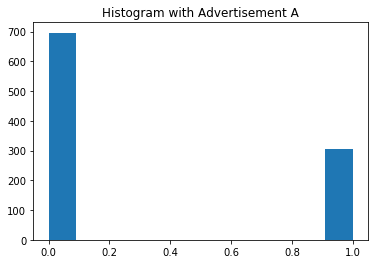

In [17]:
import matplotlib.pyplot as plt
plt.hist(XA, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with Advertisement A")
plt.show

- 클릭을 했는지 안했는지의 이산형 데이터이기 때문에 정규성을 만족 안 함
- t-Test는 연속형 데이터에서 가능하지만 연습을 위해 그냥 진행

In [18]:
# shapiro
from scipy import stats
print(stats.shapiro(XA))
print(stats.shapiro(XB))

LeveneResult(statistic=10.375956873315365, pvalue=0.0012971905467120167)

- Shapiro Test 결과 광고 A와 광고 B가 모두 p-value 매우 낮음 
- 정규성 가정을 기각 (정규성 따르지 않음)

In [19]:
from scipy.stats import levene
levene(XA,XB)

LeveneResult(statistic=10.375956873315365, pvalue=0.0012971905467120167)

Lenven Test 결과 두 집단 간의 분산에 차이가 있음

In [20]:
#use bulit-in library
from scipy import stats
T,p=stats.ttest_ind(XA,XB,  equal_var = False)
p

0.0012972410374001632

p-value는 0.0013으로 두 집단 간에 차이가 있음

# 2. Proportion Z-Test

위와 같이 횟 수에 대한 데이터일 때 집단 간에 어떻게 비교할까?

$X_{A}$: A 사이트에서 광고를 클릭한 횟수<br>
$X_{B}$: B 사이트에서 광고를 클릭한 횟수<br>
A와 B는 독립
<br>
$X_{A} \sim Binomial(n_{A},p_{A})$<br>
$X_{B} \sim Binomial(n_{B},p_{B})$

$H_{0}: p_{A}=p_{B}$<br>
$H_{a}: Not H_{0}$<br>
<br>
Test statistic: $Z= \frac{  \frac{\bar{X}_{A}}{n_{A}} -\frac{\bar{X}_{B}}{n_{B}} }{ \sqrt{  \frac{\bar{X}_{A}(1-\bar{X}_{A})  }{n_{B}}+\frac{\bar{X}_{B}(1-\bar{X}_{B})  }{n_{B}} }  }     $

In [8]:
#use bulit-in library
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
count = np.array([XA.sum(), XB.sum()])
nobs = np.array([XA.size, XA.size])
proportions_ztest(count, nobs)

(-3.2144492244084213, 0.0013069502732125403)

p-value가 낮아 귀무 가설 기각
두 집단의 평균에는 차이가 있다

# 3. Pearson Chi-squared Test 

Conversion rate가 A를 선택하는지 혹은 B를 선택하는지에 차이가 있을까?<br>
Pearson Chi-squared Test는 Contingency table을 통해 이 문제를 접근

$H_{0}$: Group A와 Group B는 독립이다 =>  A를 선택하든 B를 선택하든 차이가 없다<br>
$H_{a}$: Group A와 Group B는 독립이 아니다 => A를 선택하든 B를 선택하든 차이가 있다

$X_{A}$: A 사이트에서 광고를 클릭한 횟수<br>
$X_{B}$: B 사이트에서 광고를 클릭한 횟수<br>
<br>
$X_{A} \sim Binomial(n_{A},p_{A})$

<b>Chisquare test</b>
- 통계량: $\chi^2=\sum_{i} \frac{ (observed_{i}-expected_{i})^{2} }{expected_{i}} $ Test statistic<br>
- 독립이라고 가정했을 때의 예상 빈도수와 실제 관측 된 빈도수의 차이가 커져 통계량 역시 커짐

In [9]:
A_clk = XA.sum()
A_noclk = XA.size - XA.sum()
B_clk = XB.sum()
B_noclk = XB.size - XB.sum()
T = np.array([[A_clk, A_noclk], [B_clk, B_noclk]])

In [22]:
from scipy import stats
stats.chi2_contingency(T, correction=False)

(10.332683816299898, 0.0013069502732125406, 1, array([[338., 662.],
        [338., 662.]]))

- p-value가 0.001f로 매우 낮아 귀무가설 기각
- A,B의 선택 여부가 차이가 있음

<b>여러 집단 간의 비교</b><br>
<br>
Post Hoc Testing<br>
- N개의 그룹이 있으면 Nx2 contingency table을 만듦
- 거기에 바로 Chi-square test
- 유의한 p-value가 나오면 다음의 post-hoc test 진행

Pairwise Testing (Bonferonni)<br>
- 두 집단씩 비교<br>
- $\alpha_{new}= \frac{\alpha}{nC_{2}}$<br>
- P-value < $\alpha_{new}$ => 유의하다 (차이가 있다)

One vs Rest
- 나머지 그룹의 카운트를 다 더함
- N개의 그룹이 있으면 N번의 테스트
- $\alpha_{new}= \frac{\alpha}{N}$
- P-value < $\alpha_{new}$ => 유의하다 (차이가 있다)

# 4. P-value의 문제점

Conversion rate 0.1퍼센트의 차이가 중요할 수 있음<br>
- 예를 들어, 1백 만명이 홈페이지에 방문할 때 20원 짜리 상품을  1%의 고객이 구매하면 20만원의 수익
- 이때 conversion rate은 1%
- 만약 conversion rate을 1.1%로 늘리면 10퍼센트의 수익이 증가하게 됨

데이터가 점점 늘어날 때 p-value는 어떻게 변할까?<br>
:평균 클릭 수가 0.1인 집단과 0.11인 집단<br>
<br>
실험<br>
1) 1,2 집단에 대해 클릭 했는지 안했는지에 대한 2by2 contingency table을 만듦<br>
2) $u_{1},u_{2} \sim Uniform(0,1)$<br>
3) Uniform 분포에서 뽑은 $u_{1},u_{2}$가 평균보다 작으면 클릭을 한 것으로 카운트 (0.1, 011 확률로 클릭함)<br>
4) 클릭할 때마다 contingency table 업데이트<br>
5) 카이스퀘어 통계량 계산하여 p-value를 구해 두 집단의 평균이 같은지 확인 <br>
6) 클릭 횟수에 따라 p- value의 변화 관찰<br>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

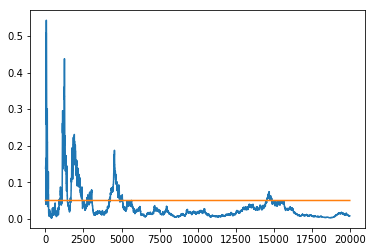

In [25]:
class DataGenerator:
  def __init__(self, p1, p2):
    self.p1 = p1
    self.p2 = p2

  def next(self):
    click1 = 1 if (np.random.random() < self.p1) else 0
    click2 = 1 if (np.random.random() < self.p2) else 0
    return click1, click2


def get_p_value(T):
  # same as scipy.stats.chi2_contingency(T, correction=False)
  det = T[0,0]*T[1,1] - T[0,1]*T[1,0]
  c2 = float(det) / T[0].sum() * det / T[1].sum() * T.sum() / T[:,0].sum() / T[:,1].sum()
  p = 1 - chi2.cdf(x=c2, df=1)
  return p


def run_experiment(p1, p2, N):
  data = DataGenerator(p1, p2)
  p_values = np.empty(N)
  T = np.zeros((2, 2)).astype(np.float32)
  for i in range(N):
    c1, c2 = data.next()
    T[0,c1] += 1
    T[1,c2] += 1
    # ignore the first 10 values
    if i < 10:
      p_values[i] = None
    else:
      p_values[i] = get_p_value(T)
  plt.plot(p_values)
  plt.plot(np.ones(N)*0.05)
  plt.show()

run_experiment(0.1, 0.11, 20000)

분석 결과

- 주황색 선은 유의 수준 0.05, 파란색 선은 p-value
- 두 집단의 평균은 0.1, 0.11로 다르기 때문에 유의하다는 결론에 도달 해야 됨
- 즉 p-value는 총 시행 중 최대 5%가 주황색 선 밑에 있는 것을 허용<br>
<br>
- 하지만 시뮬레이션 결과 많은 구간에서 주황색 아래(시뮬레이션 할때 마다 크게 변동)
- 또한 어떤 구간에서는 두 집단의 차이가 있다가 없다고 했다가 그 결론이 계속 변함

시뮬레이션을 통한 p- value의 문제점
- 평균이 다르다는 것을 아는 상태로 시뮬레이션 했는데도 일관된 결론을 못 내림
- 유의하지 않다는 것이 두 집단간의 차이가 없는 것인지 데이터가 아직 부족한지 알 수가 없음
- 데이터가 얼마나 많아야 되는지 알기가 어려움 (언제 테스트를 멈출지 알 수 없음)